### A problem of sorting can be generalized to any kind of objects, if we specify a function named Order. Let us assume we are considering a set of object. Let us denote the set as O. Then we define a Ordering function as follows:


$$ Order : O \times O -> \{ 0,1 \} $$
$$ Order(o_{1}, o_{2}) = 1,\ if\ o_{1} ">=" o_{2} ;\ 0 \ otherwise $$
I have put the ">=" in parantheses to emphasize that we can define the relationship of being greater in any way we want to.

After sorting the array of n elements of the O set, the following condition is met: 

$$ (\forall i \in \{0, 1, \dots n-2\})\ Order(o_{i}, o_{i+1}) = 1 $$

### Defining the OrderFunction.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def OrderFunction(O1:int, O2:int) -> int:
    if O2%10 >= O1%10:
        return 1
    return 0

### The timer for measuring the perfomances of Sorting Algorithms.

In [92]:
from time import perf_counter

def SingleMeasure(function:callable, min_time:float) -> float:
    czas = 0
    loop_reps = 1

    while czas < min_time:
        start:float = perf_counter()

        for _ in range(loop_reps):
            function()

        end: float = perf_counter()

        czas = end - start
        loop_reps *= 2

    return czas/loop_reps



def MultipleMeasure(function:callable, min_time:float = 0.2, n_reps: int = 2) -> float:
    
    minimal_time = SingleMeasure(function, min_time)

    for _ in range(n_reps-1):
        czas = SingleMeasure(function, min_time)
        
        if czas < minimal_time:
            minimal_time = czas

    return minimal_time



### Buble Sorting

In [93]:
def BubleSortingv1(Array) ->list:
    n = len(Array)

    for i in range(n):
        for j in range(i+1, n):
            o1, o2 = Array[i], Array[j]

            if OrderFunction(o1, o2) == 0:
                prox = o1
                Array[i] = o2
                Array[j] = prox

                del prox

    return Array

def BubleSortingv2(Array) -> list:
    for i in range(len(Array)):
        for j in range(i+1, len(Array)):
        
            if OrderFunction(Array[i], Array[j]) == 0:
                prox = Array[i]
                Array[i] = Array[j]
                Array[j] = prox

    return Array

        




### Selection Sort.

In [94]:
def SelectionSort(Array:list):
    n = len(Array)


    for i in range(n):
        min_value = Array[i]
        change: bool = False

        for j in range(i+1, n):
            kandydad = Array[j]

            if OrderFunction(min_value, kandydad) == 0:
                min_value = kandydad

                if change is False:
                    change = True

        if  change == True:
            Array[i] = min_value

    return Array





### Insertion Sort

In [95]:
def InsertSort(A):
    for i in range(1,len(A)):
        klucz = A[i]
        j = i - 1

        while j>=0 and A[j]>=klucz:
            A[j + 1] = A[j]
            j = j - 1

        A[j + 1] = klucz
        

    return A




### The great comparison of the six sorting methods.

5
10
15
20
25
30
35
40
45


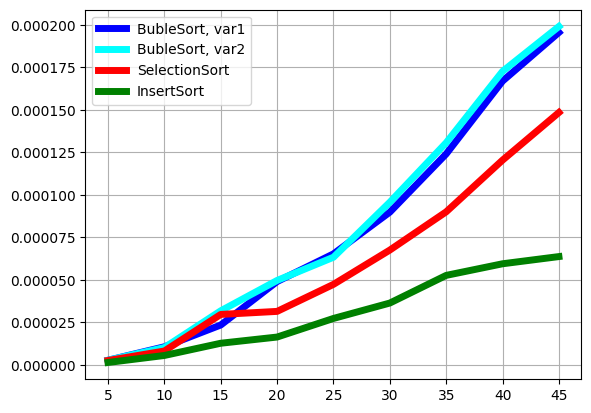

In [96]:
DługosciTablic = []

CzasyBub1: list[float] = []
CzasyBub2: list[float] = []

CzasySel: list[float] = []
CzasyIns: list[float] = []



step: int =5
end:int = 50
for i in range(step,end , step):
    DługosciTablic.append(i)

    Tablica = np.random.randint(-500, 500, size = i)
    

    CzasBub1 = MultipleMeasure( lambda : BubleSortingv1(Tablica.copy()), 0.2, 2)
    CzasBub2 = MultipleMeasure( lambda : BubleSortingv2(Tablica.copy()), 0.2, 2)
    
    CzasSel = MultipleMeasure( lambda : SelectionSort(Tablica.copy()), 0.2, 2)
    CzasIns = MultipleMeasure( lambda : InsertSort(Tablica.copy()), 0.2, 2)

   
    CzasySel.append(CzasSel)    
    CzasyBub1.append(CzasBub1)
    CzasyBub2.append(CzasBub2)
    CzasyIns.append(CzasIns)


    print(i)




okienko  = plt.figure()
osie = okienko.add_subplot()



osie.plot(DługosciTablic, CzasyBub1, linewidth = 5, color=  "blue")
osie.plot(DługosciTablic, CzasyBub2, linewidth = 5, color = "cyan")
osie.plot(DługosciTablic, CzasySel, linewidth = 5, color = "red")
osie.plot(DługosciTablic, CzasyIns, linewidth = 5, color= "green")



osie.grid(True)
osie.legend(['BubleSort, var1', 'BubleSort, var2', 'SelectionSort','InsertSort'])

